# Análisis de Láminas

## Muestra 1

### Gráfica de reflectancia

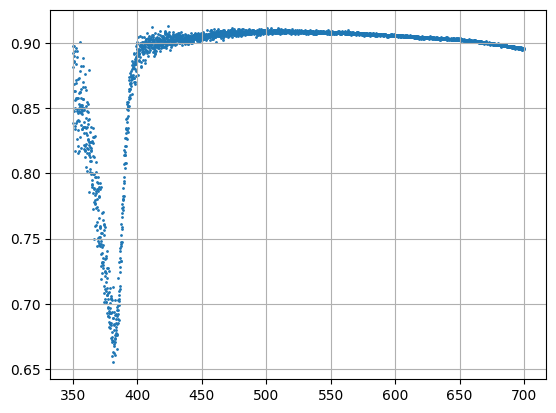

In [2]:
import pandas as pd
import numpy as np



df_referencia = pd.read_csv("estandar.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra = pd.read_csv("ZnO_layer_1.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_dark = pd.read_csv("dark.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referencia.iloc[:-1,0].values, dtype=float)
radiancia_referencia = df_referencia.iloc[:-1,1].values
radiancia_muestra = df_muestra.iloc[:-1,1].values
radiancia_dark = df_dark.iloc[:-1,1].values


reflectancia = np.array(  (radiancia_muestra - radiancia_dark) / (radiancia_referencia - radiancia_dark))
import matplotlib.pyplot as plt
import numpy as np
mask = (longitud_onda>350) & (longitud_onda<700)

plt.scatter(longitud_onda[mask], reflectancia[mask], s=1)
plt.grid()
plt.show()



### Uso de Kubelka-Munk

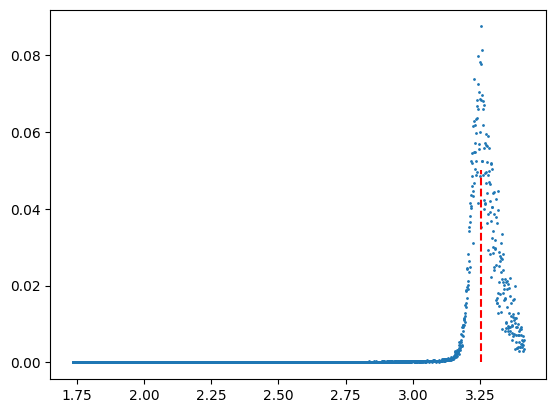

In [3]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)



y0 = (F[mask]* x[mask]  )**(1/n[0])
plt.scatter(x[mask],y0, s=1 )
plt.plot([x[mask][np.where(y0 == np.max(y0))[0][0]], x[mask][np.where(y0 == np.max(y0))[0][0]]], [0, 0.05], "r--")
plt.show()

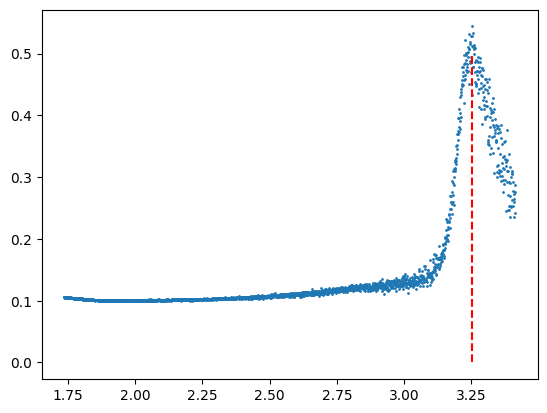

In [4]:
y1 = (F[mask]* x[mask]  )**(1/n[1])
plt.scatter(x[mask],y1, s=1 )
plt.plot([x[mask][np.where(y1 == np.max(y1))[0][0]], x[mask][np.where(y1 == np.max(y1))[0][0]]], [0, 0.5], "r--")
plt.show()

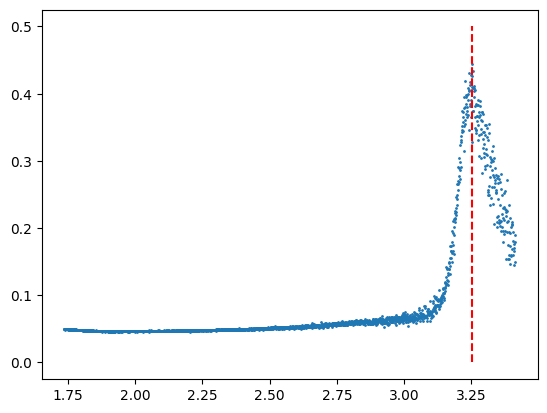

In [5]:
y2 = (F[mask]* x[mask]  )**(1/n[2])
plt.scatter(x[mask],y2, s=1 )
plt.plot([x[mask][np.where(y2 == np.max(y2))[0][0]], x[mask][np.where(y2 == np.max(y2))[0][0]]], [0, 0.5], "r--")
plt.show()

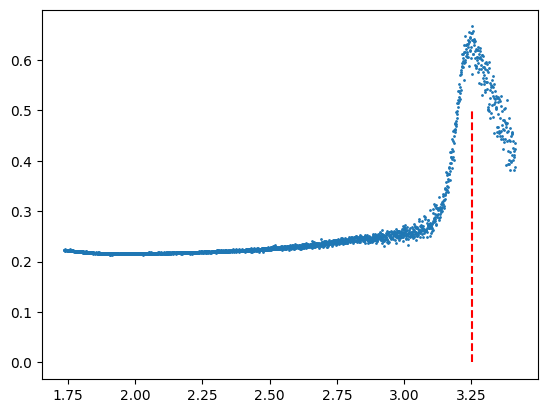

In [6]:
y3 = (F[mask]* x[mask]  )**(1/n[3])
plt.scatter(x[mask],y3, s=1 )
plt.plot([x[mask][np.where(y3 == np.max(y3))[0][0]], x[mask][np.where(y3 == np.max(y3))[0][0]]], [0, 0.5], "r--")
plt.show()

### REGRESIÓN LINEAL

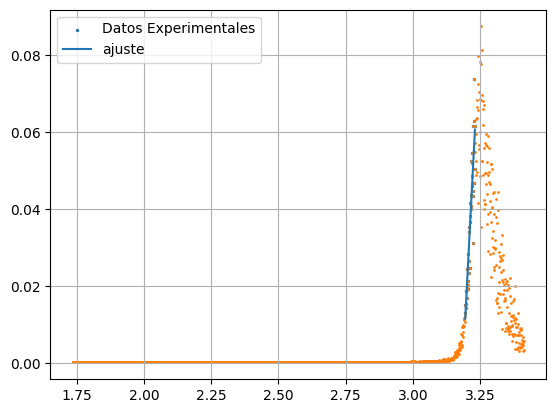

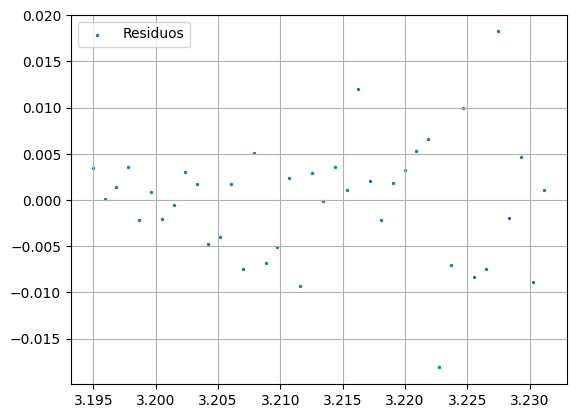

-3.1865842692316932 0.8377014145327337


In [7]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y0 == np.max(y0))[0][0]]

mask_lin = (x>3.195) & (x<x_max-0.02) 

x_lin0 = x[mask_lin]
y_lin0 = (F[mask_lin]* x[mask_lin]  )**(1/n[0])


slope, intercept, r_value, p_value, std_err = linregress(x_lin0, y_lin0)

plt.scatter(x_lin0, y_lin0, s=2, label = 'Datos Experimentales')
plt.plot(x_lin0, slope*x_lin0 + intercept, label = 'ajuste')
plt.scatter(x[mask],y0, s=1 )
plt.legend()
plt.grid()
plt.show()
plt.scatter(x_lin0, y_lin0- (slope*x_lin0 + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope), r_value**2)



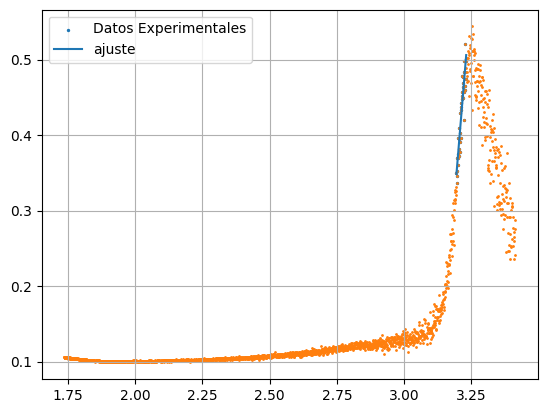

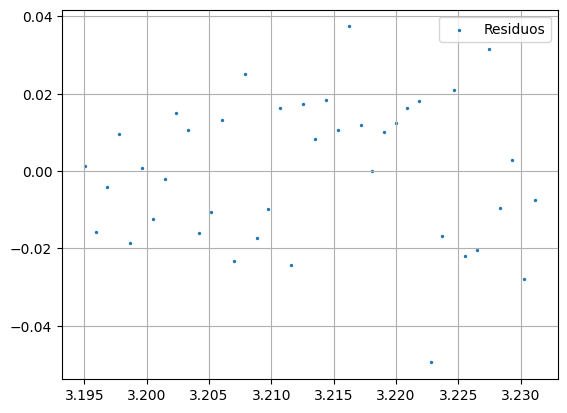

-3.1149161875741838 0.8664405676797977


In [8]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y1 == np.max(y1))[0][0]]

mask_lin = (x>3.195) & (x<x_max-0.02) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[1])
# mask_joda = y_lin<.36
# x_lin = x_lin[mask_joda]
# y_lin = y_lin[mask_joda]

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y1, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)


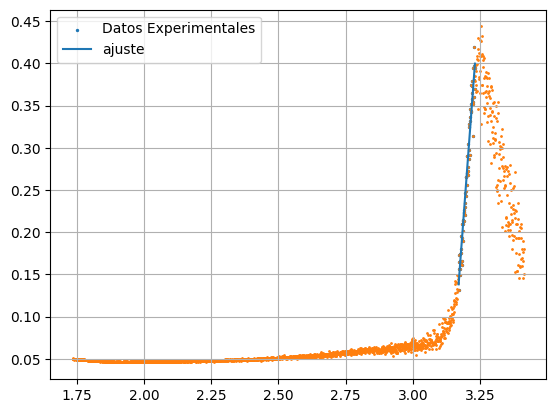

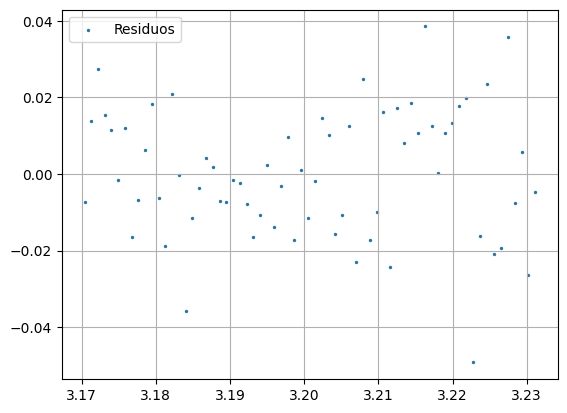

-3.138267416324112 0.9549062237716721


In [9]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y2 == np.max(y2))[0][0]]

mask_lin = (x>3.17) & (x<x_max-0.02) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[2])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y2, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

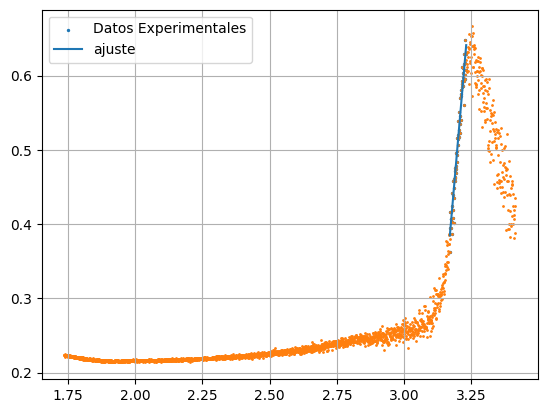

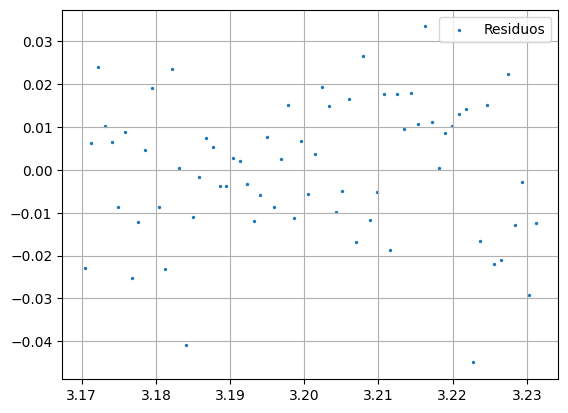

-3.07908769786887 0.9567183907832494


In [10]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y3 == np.max(y3))[0][0]]

mask_lin = (x>3.17) & (x<x_max-0.02) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[3])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y3, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

## Muestra 2

### Gráfica de reflectancia

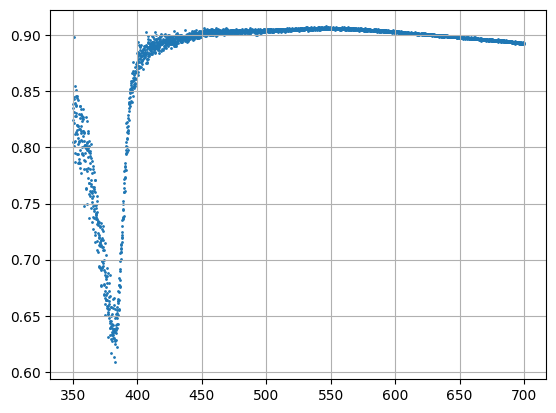

In [11]:
import pandas as pd
import numpy as np



df_referencia = pd.read_csv("estandar.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra = pd.read_csv("ZnO_layer_2.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_dark = pd.read_csv("dark.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referencia.iloc[:-1,0].values, dtype=float)
radiancia_referencia = df_referencia.iloc[:-1,1].values
radiancia_muestra = df_muestra.iloc[:-1,1].values
radiancia_dark = df_dark.iloc[:-1,1].values


reflectancia = np.array(  (radiancia_muestra - radiancia_dark) / (radiancia_referencia - radiancia_dark))
import matplotlib.pyplot as plt
import numpy as np
mask = (longitud_onda>350) & (longitud_onda<700)

plt.scatter(longitud_onda[mask], reflectancia[mask], s=1)
plt.grid()
plt.show()

### Uso de Kubelka-Munk

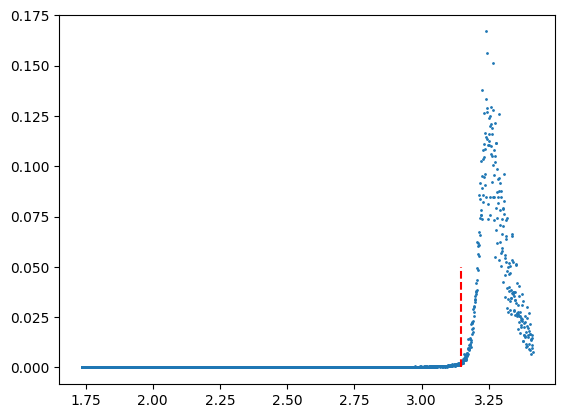

In [12]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y0 = (F[mask]* x[mask]  )**(1/n[0])
plt.scatter(x[mask],y0, s=1 )
plt.plot([3.145, 3.145], [0, 0.05], "r--")
plt.show()

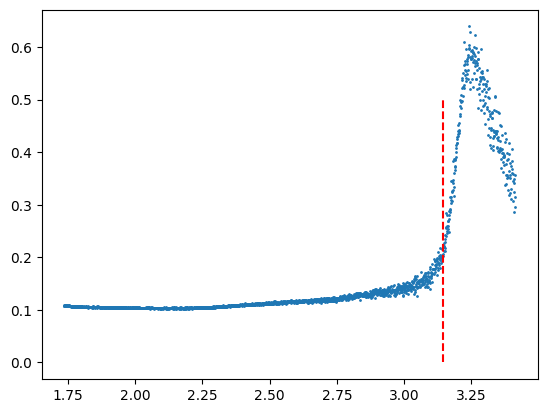

In [13]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y1 = (F[mask]* x[mask]  )**(1/n[1])
plt.scatter(x[mask],y1, s=1 )
plt.plot([3.145, 3.145], [0, 0.5], "r--")
plt.show()

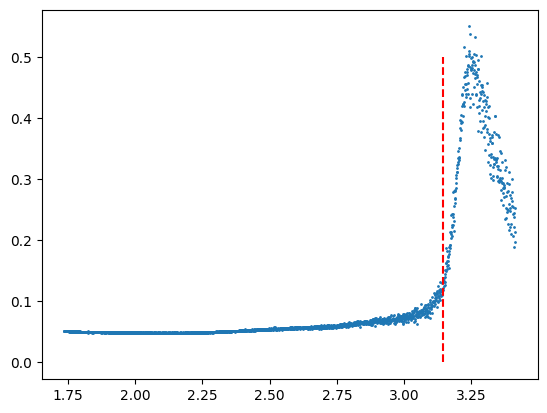

In [14]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y2 = (F[mask]* x[mask]  )**(1/n[2])
plt.scatter(x[mask],y2, s=1 )
plt.plot([3.145, 3.145], [0, 0.5], "r--")
plt.show()

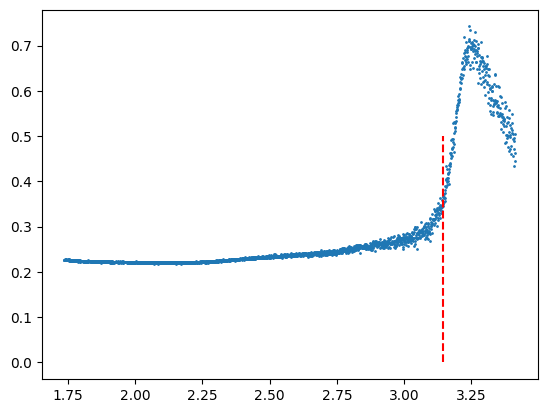

In [15]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y3 = (F[mask]* x[mask]  )**(1/n[3])
plt.scatter(x[mask],y3, s=1 )
plt.plot([3.145, 3.145], [0, 0.5], "r--")
plt.show()

### Regresión lineal

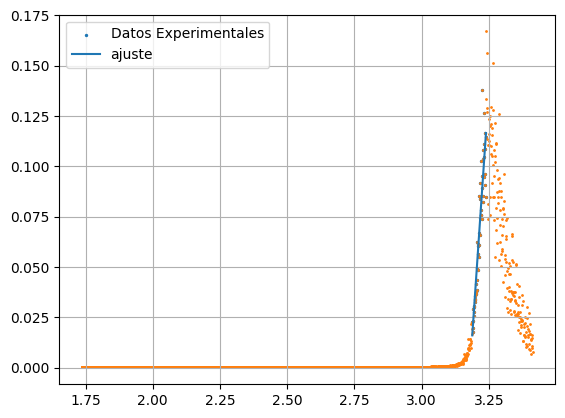

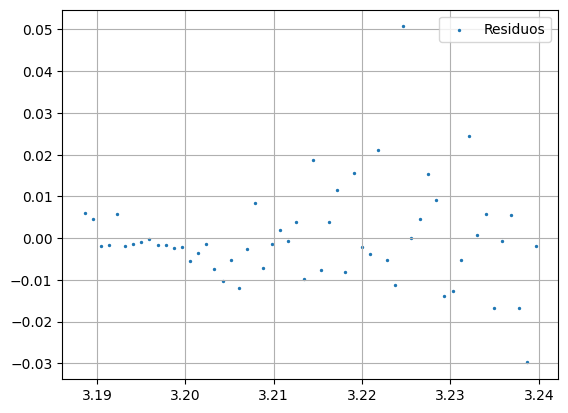

-3.1804466047493842 0.8648005511818687


In [16]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y0 == np.max(y0))[0][0]]

mask_lin = (x>3.188) & (x<3.24) 

x_lin0 = x[mask_lin]
y_lin0 = (F[mask_lin]* x[mask_lin]  )**(1/n[0])


slope, intercept, r_value, p_value, std_err = linregress(x_lin0, y_lin0)

plt.scatter(x_lin0, y_lin0, s=2, label = 'Datos Experimentales')
plt.plot(x_lin0, slope*x_lin0 + intercept, label = 'ajuste')
plt.scatter(x[mask],y0, s=1 )
plt.legend()
plt.grid()
plt.show()
plt.scatter(x_lin0, y_lin0- (slope*x_lin0 + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope), r_value**2)

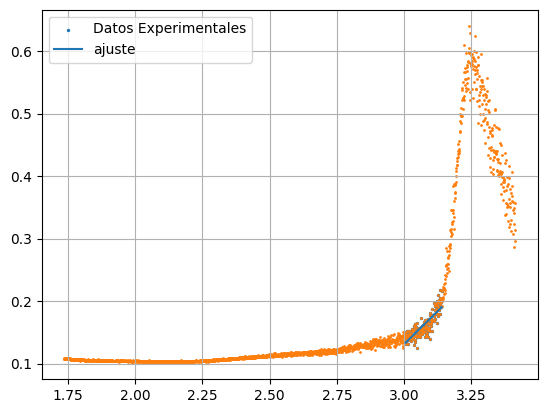

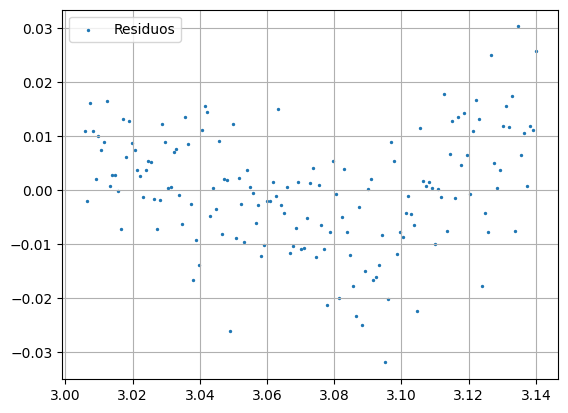

-2.690234604742425 0.7039909122398936


In [17]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y1 == np.max(y1))[0][0]]

mask_lin = (x>3.005) & (x<3.14) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[1])
# mask_joda = y_lin<.36
# x_lin = x_lin[mask_joda]
# y_lin = y_lin[mask_joda]

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y1, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

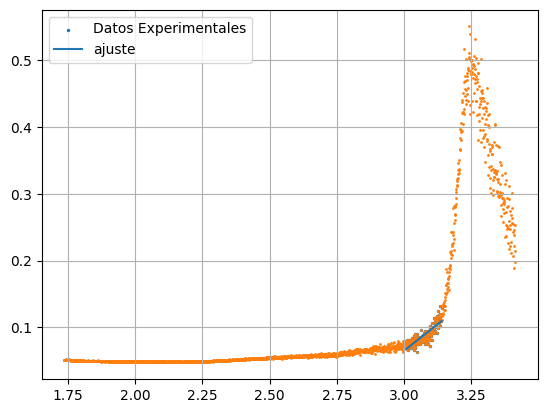

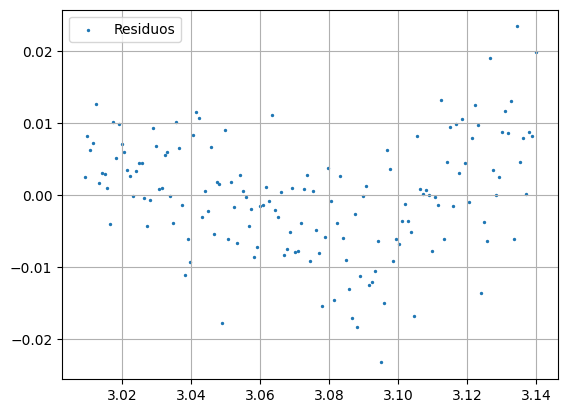

-2.7959666587100918 0.7015037410738605


In [18]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y2 == np.max(y2))[0][0]]

mask_lin = (x>3.009) & (x<3.14) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[2])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y2, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

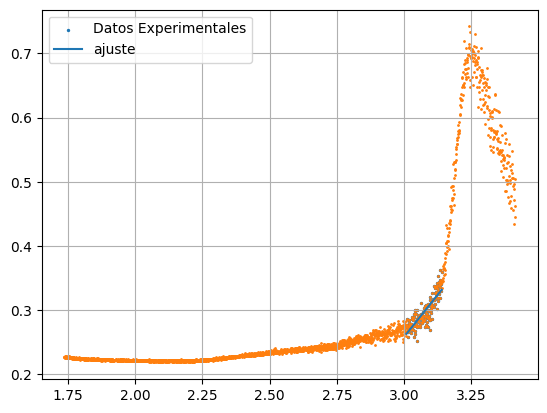

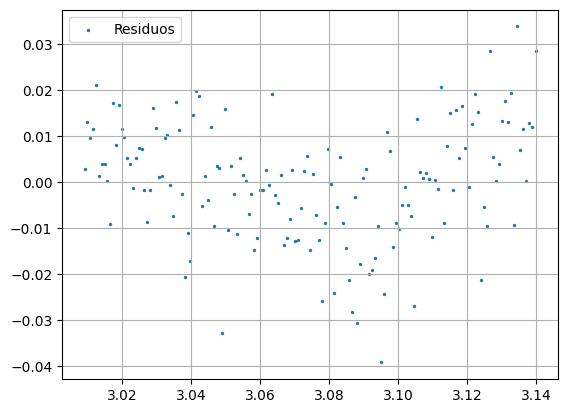

-2.5083336167384642 0.7076829627452449


In [19]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y3 == np.max(y3))[0][0]]

mask_lin = (x>3.009) & (x<3.14) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[3])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y3, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

## Muestre 3

### Gráfica de reflectancia

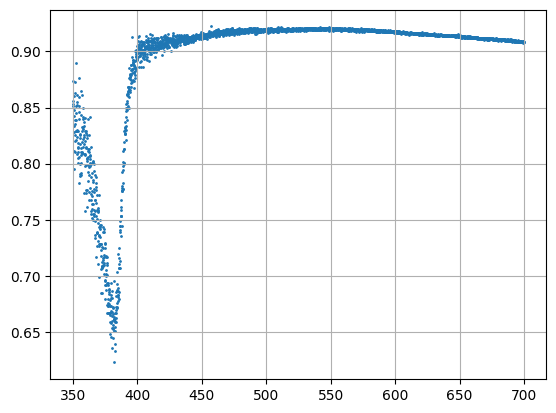

In [20]:
import pandas as pd
import numpy as np



df_referencia = pd.read_csv("estandar.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra = pd.read_csv("ZnO_layer_3.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_dark = pd.read_csv("dark.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referencia.iloc[:-1,0].values, dtype=float)
radiancia_referencia = df_referencia.iloc[:-1,1].values
radiancia_muestra = df_muestra.iloc[:-1,1].values
radiancia_dark = df_dark.iloc[:-1,1].values


reflectancia = np.array(  (radiancia_muestra - radiancia_dark) / (radiancia_referencia - radiancia_dark))
import matplotlib.pyplot as plt
import numpy as np
mask = (longitud_onda>350) & (longitud_onda<700)

plt.scatter(longitud_onda[mask], reflectancia[mask], s=1)
plt.grid()
plt.show()

### Uso de Kubelka-Munk

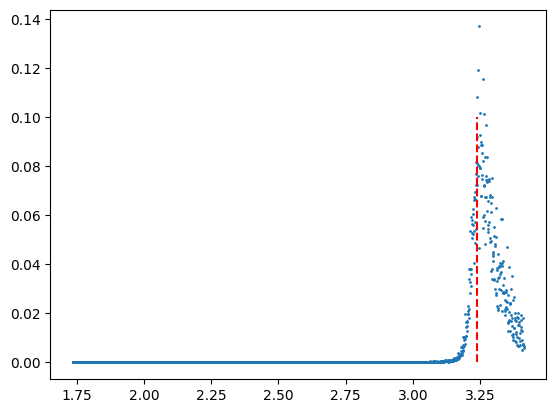

In [21]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y0 = (F[mask]* x[mask]  )**(1/n[0])
plt.scatter(x[mask],y0, s=1 )
plt.plot([3.24, 3.24], [0, 0.1], "r--")
plt.show()

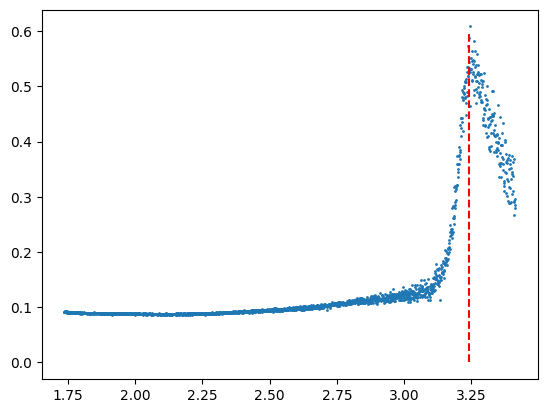

In [22]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y1 = (F[mask]* x[mask]  )**(1/n[1])
plt.scatter(x[mask],y1, s=1 )
plt.plot([3.24, 3.24], [0, 0.6], "r--")
plt.show()

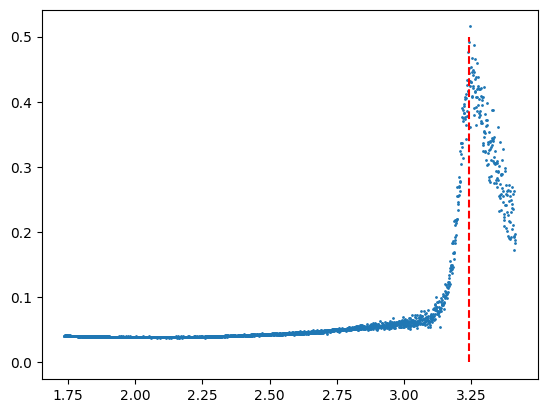

In [23]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y2 = (F[mask]* x[mask]  )**(1/n[2])
plt.scatter(x[mask],y2, s=1 )
plt.plot([3.24, 3.24], [0, 0.5], "r--")
plt.show()

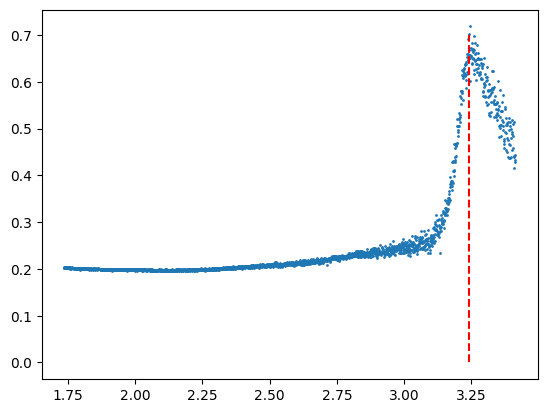

In [24]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y3 = (F[mask]* x[mask]  )**(1/n[3])
plt.scatter(x[mask],y3, s=1 )
plt.plot([3.24, 3.24], [0, 0.7], "r--")
plt.show()

### Regresión lineal

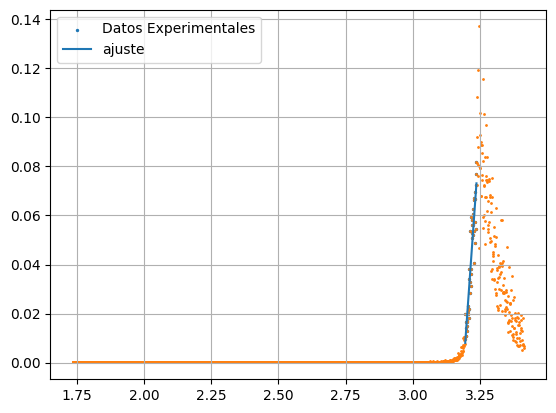

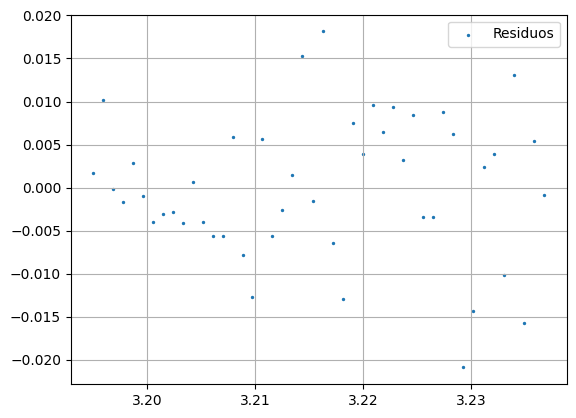

-3.1898229005720196 0.8460375411718913


In [25]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y0 == np.max(y0))[0][0]]

mask_lin = (x>3.195) & (x<x_max-0.008) 

x_lin0 = x[mask_lin]
y_lin0 = (F[mask_lin]* x[mask_lin]  )**(1/n[0])


slope, intercept, r_value, p_value, std_err = linregress(x_lin0, y_lin0)

plt.scatter(x_lin0, y_lin0, s=2, label = 'Datos Experimentales')
plt.plot(x_lin0, slope*x_lin0 + intercept, label = 'ajuste')
plt.scatter(x[mask],y0, s=1 )
plt.legend()
plt.grid()
plt.show()
plt.scatter(x_lin0, y_lin0- (slope*x_lin0 + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope), r_value**2)

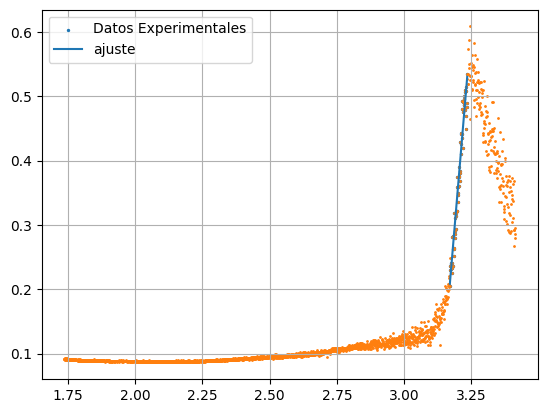

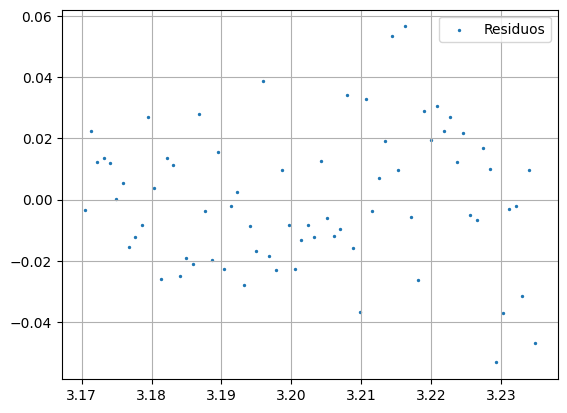

-3.128516225701672 0.9477091929138737


In [26]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y1 == np.max(y1))[0][0]]

mask_lin = (x>3.17) & (x<x_max-0.01) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[1])
# mask_joda = y_lin<.36
# x_lin = x_lin[mask_joda]
# y_lin = y_lin[mask_joda]

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y1, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

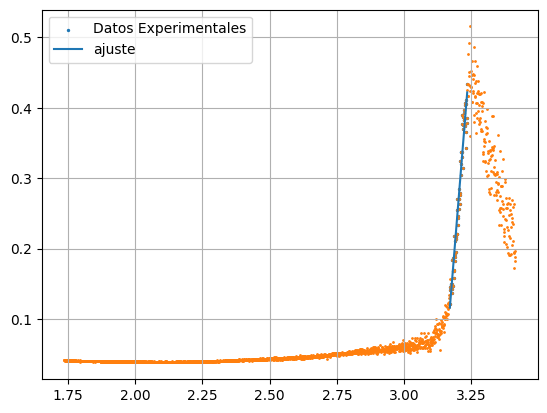

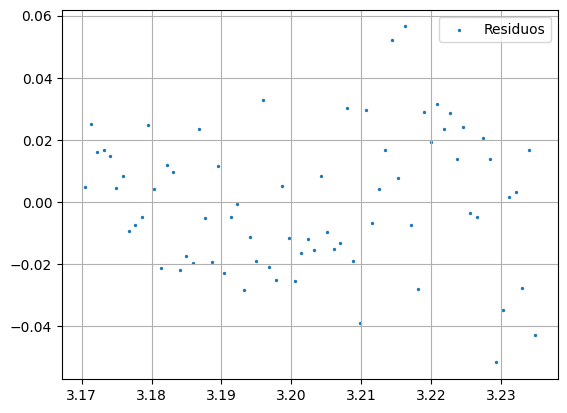

-3.145929596819203 0.9438352465015257


In [27]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y2 == np.max(y2))[0][0]]

mask_lin = (x>3.17) & (x<x_max-0.01) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[2])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y2, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

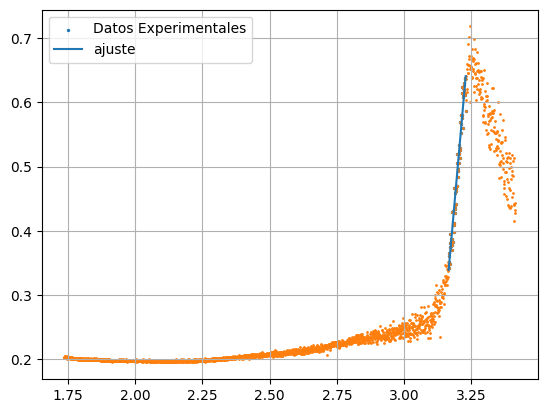

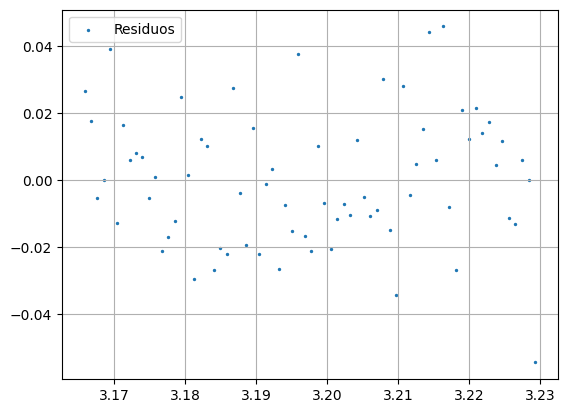

-3.094560557953729 0.9528729051018541


In [28]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y3 == np.max(y3))[0][0]]

mask_lin = (x>3.165) & (x<3.23) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[3])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y3, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

## Gráficas a presentar

Para dejar bonito todo

### Gráficas de reflectancia de las 3 muestras

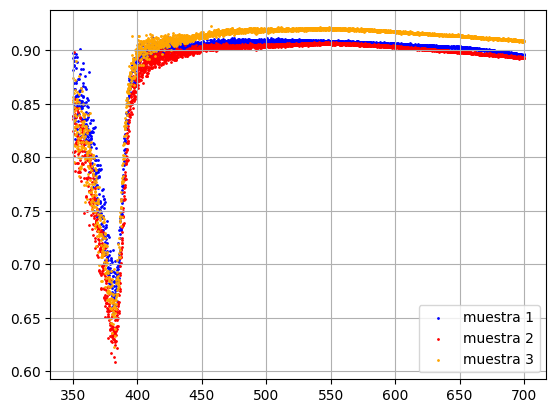

In [29]:
import pandas as pd
import numpy as np



df_referencia = pd.read_csv("estandar.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra1 = pd.read_csv("ZnO_layer_1.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra2 = pd.read_csv("ZnO_layer_2.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra3 = pd.read_csv("ZnO_layer_3.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_dark = pd.read_csv("dark.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referencia.iloc[:-1,0].values, dtype=float)
radiancia_referencia = df_referencia.iloc[:-1,1].values
radiancia_muestra1 = df_muestra1.iloc[:-1,1].values
radiancia_muestra2 = df_muestra2.iloc[:-1,1].values
radiancia_muestra3 = df_muestra3.iloc[:-1,1].values
radiancia_dark = df_dark.iloc[:-1,1].values


reflectancia1 = np.array(  (radiancia_muestra1 - radiancia_dark) / (radiancia_referencia - radiancia_dark))
reflectancia2 = np.array(  (radiancia_muestra2 - radiancia_dark) / (radiancia_referencia - radiancia_dark))
reflectancia3 = np.array(  (radiancia_muestra3 - radiancia_dark) / (radiancia_referencia - radiancia_dark))

import matplotlib.pyplot as plt
import numpy as np
mask = (longitud_onda>350) & (longitud_onda<700)

plt.scatter(longitud_onda[mask], reflectancia1[mask], s=1, label = 'muestra 1', color = 'blue')
plt.scatter(longitud_onda[mask], reflectancia2[mask], s=1, label = 'muestra 2', color = 'red')
plt.scatter(longitud_onda[mask], reflectancia3[mask], s=1, label = "muestra 3", color = 'orange')
plt.legend()
plt.grid()
plt.show()


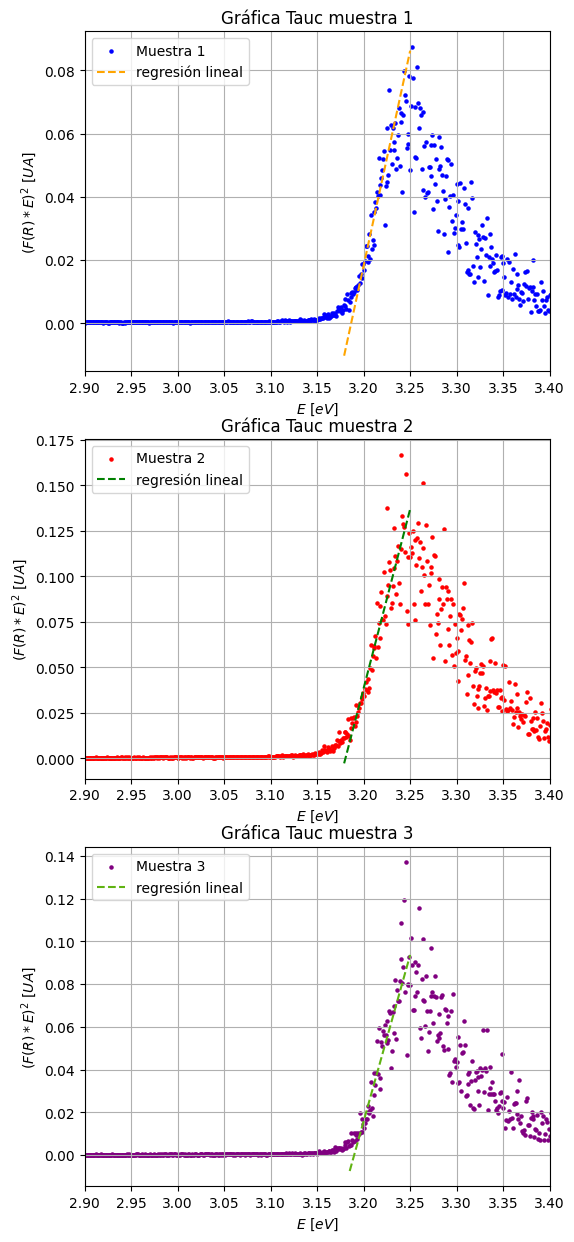

[np.float64(-3.1865842692316932), np.float64(-3.1804466047493842), np.float64(-3.1898229005720196)]
[np.float64(-0.32312065596999406), np.float64(-0.2432922253801043), np.float64(-0.29129937833192987)]


In [38]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F1 = (1-reflectancia1)**2 / (2*reflectancia1)
F1 = np.flip(F1)
p = 1/2
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)
y1 = (F1[mask]* x[mask]  )**(1/p)
x_max1 = x[mask][np.where(y1 == np.max(y1))[0][0]]

F2 = (1-reflectancia2)**2 / (2*reflectancia2)
F2 = np.flip(F2)
y2 = (F2[mask]* x[mask]  )**(1/p)
x_max2 = x[mask][np.where(y2 == np.max(y2))[0][0]]


F3 = (1-reflectancia3)**2 / (2*reflectancia3)
F3 = np.flip(F3)
y3 = (F3[mask]* x[mask]  )**(1/p)
x_max3 = x[mask][np.where(y3 == np.max(y3))[0][0]]


from scipy.stats import linregress
from scipy.constants import h, e

mask_lin1 = (x>3.195) & (x<x_max1-0.02) 
x_lin1 = x[mask_lin1]
y_lin1 = (F1[mask_lin1]* x[mask_lin1]  )**(1/p)
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x_lin1, y_lin1)

mask_lin2 = (x>3.188) & (x<3.24)
x_lin2 = x[mask_lin2]
y_lin2 = (F2[mask_lin2]* x[mask_lin2]  )**(1/p)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x_lin2, y_lin2)

mask_lin3  = (x>3.195) & (x<x_max-0.008) 
x_lin3 = x[mask_lin3]
y_lin3 = (F3[mask_lin3]* x[mask_lin3]  )**(1/p)
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(x_lin3, y_lin3)


slopes = [slope1, slope2, slope3]
intercepts = [intercept1, intercept2, intercept3]
incer_slopes = [std_err1, std_err2, std_err3]
incer_inter = [0.3118926608111297, 0.34047140050956964, 0.3217932303767108]

bandgaps = []
incertidumbres = []

fig,ax = plt.subplots(3,1, figsize=(6,15))

ax[0].scatter(x[mask],y1, s=5, marker ='o', color = 'blue', label = 'Muestra 1' )
ax[0].plot(np.linspace(3.179, 3.25, 100), np.linspace(3.179, 3.25, 100)*slope1 +intercept1, '--', color = 'orange', label = f'regresión lineal' )
ax[0].set_xlim(2.9, 3.40)
ax[0].locator_params(axis="x", nbins=15)
ax[0].set_title('Gráfica Tauc muestra 1')
ax[0].set_xlabel(r'$E$ $[eV]$')
ax[0].set_ylabel(r'$(F(R)*E)^2$ $[UA]$')
ax[0].grid()
ax[0].legend()


ax[1].scatter(x[mask],y2, s=5, marker ='o', color = 'red', label = 'Muestra 2' )
ax[1].plot(np.linspace(3.179, 3.25, 100), np.linspace(3.179, 3.25, 100)*slope2 +intercept2, '--', color = 'green', label = f'regresión lineal' )
ax[1].set_xlim(2.9, 3.40)
ax[1].locator_params(axis="x", nbins=15)
ax[1].set_title('Gráfica Tauc muestra 2')
ax[1].set_xlabel(r'$E$ $[eV]$')
ax[1].set_ylabel(r'$(F(R)*E)^2$ $[UA]$')
ax[1].grid()
ax[1].legend()

ax[2].scatter(x[mask],y3, s=5, marker ='o', color = 'purple', label = 'Muestra 3' )
ax[2].set_xlim(2.9, 3.40)
ax[2].locator_params(axis="x", nbins=15)
ax[2].plot(np.linspace(3.185, 3.25, 100), np.linspace(3.185, 3.25, 100)*slope3 +intercept3, '--', color = '#60B312', label = f'regresión lineal' )
ax[2].set_xlabel(r'$E$ $[eV]$')
ax[2].set_title('Gráfica Tauc muestra 3')
ax[2].set_ylabel(r'$(F(R)*E)^2$ $[UA]$')
ax[2].grid()
ax[2].legend()

#plt.plot([x[mask][np.where(y1 == np.max(y1))[0][0]], x[mask][np.where(y1 == np.max(y1))[0][0]]], [0, 0.2], "r--")

plt.show()

for i in range(3):
    bandgaps.append(intercepts[i]/slopes[i])
    incertidumbres.append(bandgaps[i]*np.sqrt((incer_inter[i]/intercepts[i])**2 + (incer_slopes[i]/slopes[i])**2))
print(bandgaps)
print(incertidumbres)